#Explore Reactive Agent

`reactive_agent.py` defines a class and a few helper functions for exploring a version of the model. This model is the one in which agents are paired and determine their phenotype reactive compared to the other agent.

Import the module along with a few others that will be necessary

In [1]:
from reactive_agent import *
import sweepy

%matplotlib inline

Happy sweeping!


Note: For some reason, i.e. I'm an idiot, I decided that x=1 referes to the stategy B, aka defect. This is contrary to the model parental_agent in which this convention is reversed!

Look at a single instance of the model and see what the code outputs.

Mean x =  1.13726450479e-09
Mean beta =  0.131515110703
Final Fitness =  -2.10569706068e-12


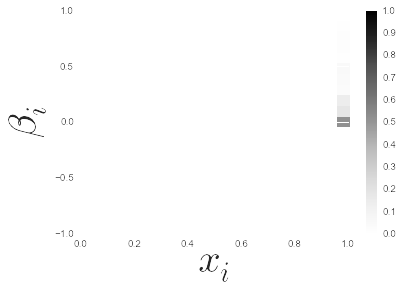

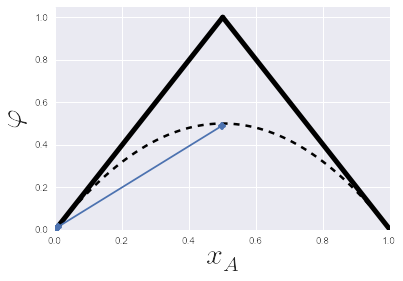

In [4]:
model = GP_evo(S = -.3, T = 1.7)
model.go()

It seems in this model the outcome is simply the all defect state. Does this change if I descrease the grod sizes.

Mean x =  5.22656362634e-10
Mean beta =  0.0607745668198
Final Fitness =  3.18982970669e-10


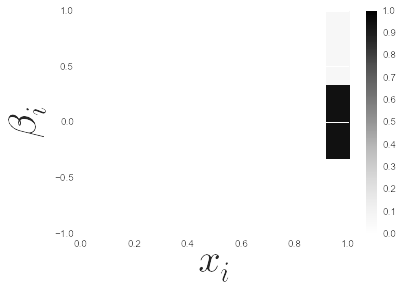

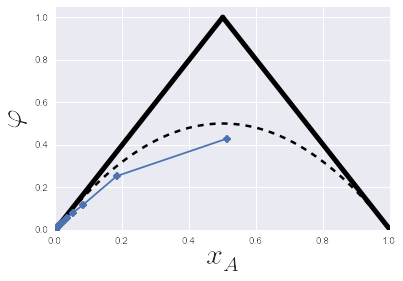

In [5]:
model = GP_evo(S = -.3, T = 1.7, x_points = 11, beta_points = 3)
model.go()

The outcome seems to be very similar. What about with some relatedness.

Mean x =  -3.40993899783e-12
Mean beta =  -1.0
Final Fitness =  0.700000000005


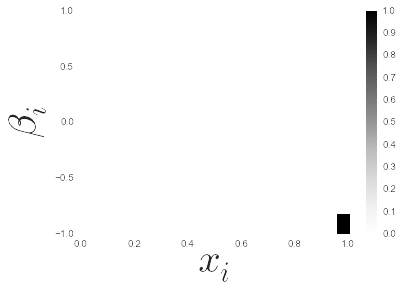

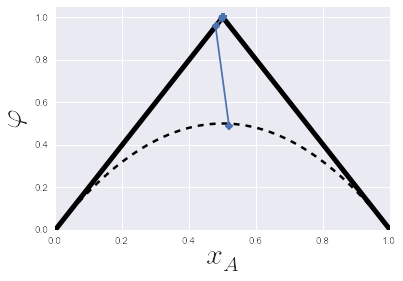

In [6]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21, beta_points = 11, alpha =0.3)
model.go()

This evolves to the structured ESS of the DOL game, however, this is not a DOL game!

We can also call this model as on of the two special cases. Here for the mixed strategy model.

Mean x =  8.59859694557e-09
Mean beta =  0.0
Final Fitness =  2.04198247241e-08


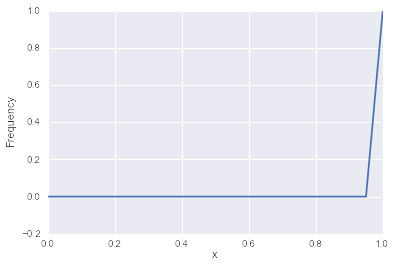

In [7]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21, beta_points = 11, modNum = 2)
model.go()

This show that final frequency distibution of the population.

This with relatedness


Mean x =  0.406666712253
Mean beta =  0.0
Final Fitness =  0.502530726469


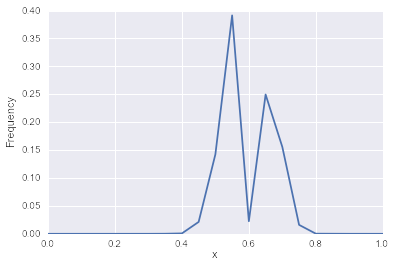

In [8]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21, beta_points = 11, modNum = 2, alpha = 0.3)
model.go()

And an even higher level of relatedness.

Mean x =  0.999999706605
Mean beta =  0.0
Final Fitness =  0.99999981982


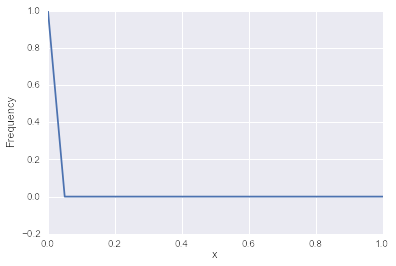

In [9]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21,\
               beta_points = 11, modNum = 2, alpha = 0.7)
model.go()

Complete cooperation evolves.

Look at a few different versions of this and have a poke around. How does changing grid size etc. effect things.

Let's look at the pure strategy model.

Mean x =  -5.83575410218e-11
Mean beta =  0.0
Final Fitness =  -8.16891766059e-11


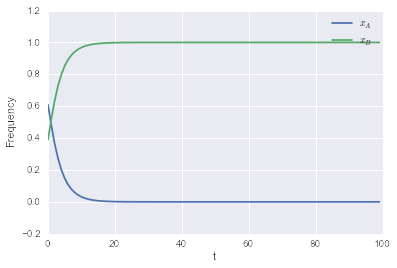

In [10]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21, beta_points = 11, modNum = 1 )
model.go()

This one outputs a time series.

Mean x =  1.00000000001
Mean beta =  0.0
Final Fitness =  0.999999999228


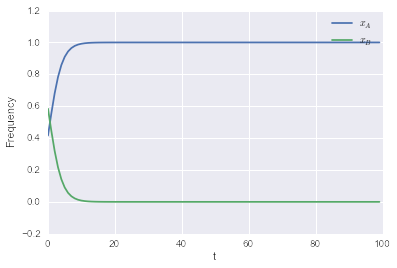

In [11]:
model = GP_evo(S = -.3, T = 1.7, x_points = 21, beta_points = 11, modNum = 1, alpha = 0.7)
model.go()

Again not that intersting.

Look at some DOL games now.

Mean x =  -1.22109433676e-09
Mean beta =  0.103909934308
Final Fitness =  -9.84902154818e-14


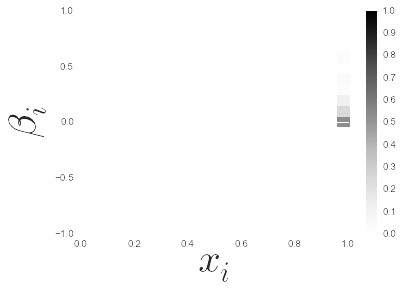

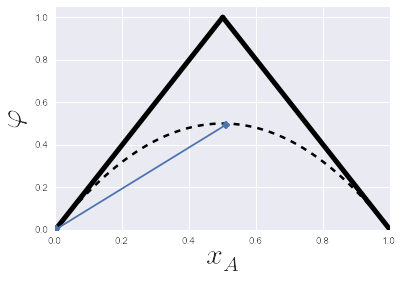

In [12]:
S_DOL_PD = -0.3
T_DOL_PD = 3.8
model = GP_evo(S_DOL_PD, T_DOL_PD)
model.go()

Mean x =  -1.95399252334e-14
Mean beta =  -1.0
Final Fitness =  1.75


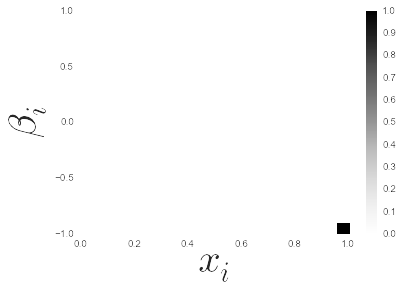

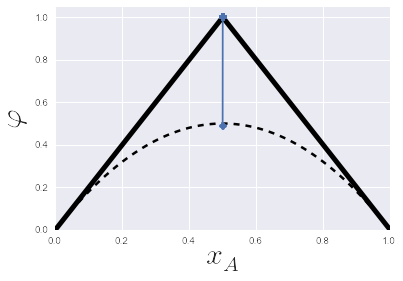

In [13]:
model = GP_evo(S_DOL_PD, T_DOL_PD, alpha = 0.3)
model.go()

Mean x =  -2.32036612147e-13
Mean beta =  -1.0
Final Fitness =  1.75


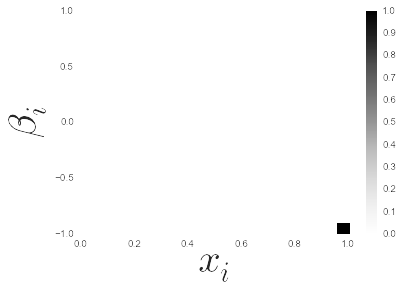

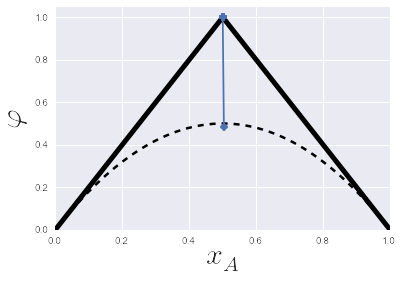

In [14]:
model = GP_evo(S_DOL_PD, T_DOL_PD, alpha = 0.7)
model.go()

Try this for model 2

Mean x =  3.59521357129e-09
Mean beta =  0.0
Final Fitness =  1.25471818718e-08


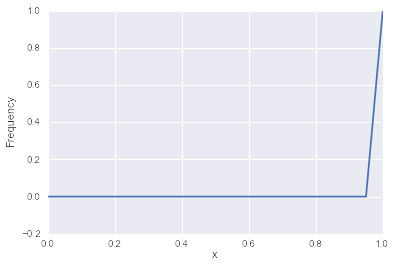

In [15]:
model = GP_evo(S_DOL_PD, T_DOL_PD, modNum = 2)
model.go()

Mean x =  0.551363661005
Mean beta =  0.0
Final Fitness =  1.1696133954


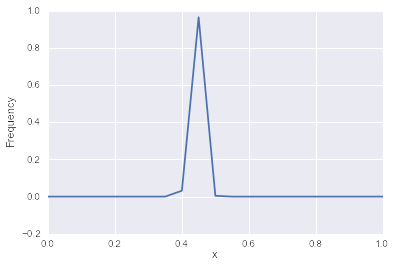

In [16]:
model = GP_evo(S_DOL_PD, T_DOL_PD, modNum = 2, alpha = 0.7)
model.go()

Mean x =  2.52575738102e-13
Mean beta =  -1.0
Final Fitness =  0.95


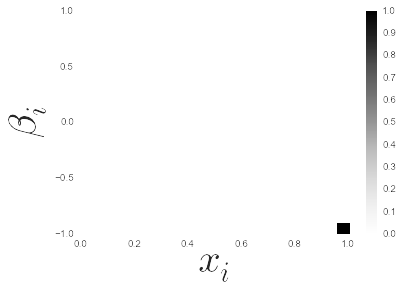

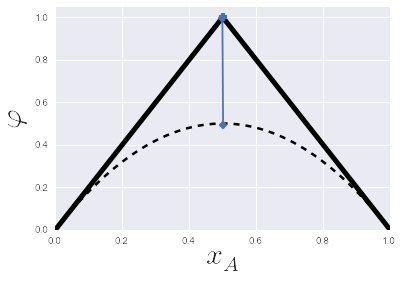

In [17]:
##Snowdrift game
model = GP_evo(S = .3, T = 1.6)
model.go()

Do an alpha sweep for one model and poke around with the options

Gennerating data
Rep: 0


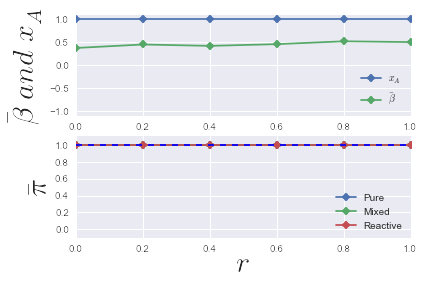

In [8]:
make_3mod_comparison_figure( 0.3, 0.7, reps = 1, alphaPoints = 6, output = False  )

Run all the paradigm games by calling examples.

A non-DOL Harmony Game
Gennerating data
Rep: 0
A DOL harmony Game
Gennerating data
Rep: 0
A Staghunt game
Gennerating data
Rep: 0
A non-DOL Snowdrift game
Gennerating data
Rep: 0
A DOL snowdrift Game
Gennerating data
Rep: 0
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
A non-DOL PD
Gennerating data
Rep: 0
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
A DOL PD
Loading data from file ../figures_appendix2/data\3_mods_S_-0.2_T_4.0.p


ValueError: x and y must have same first dimension

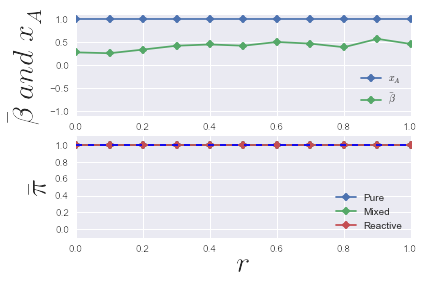

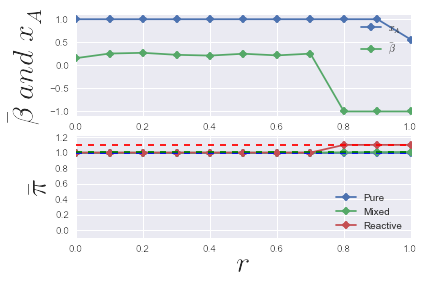

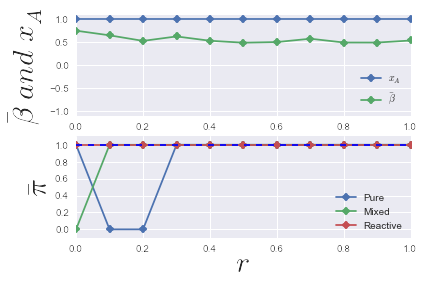

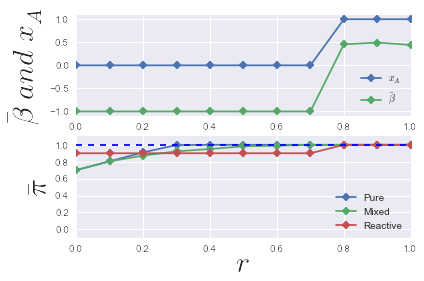

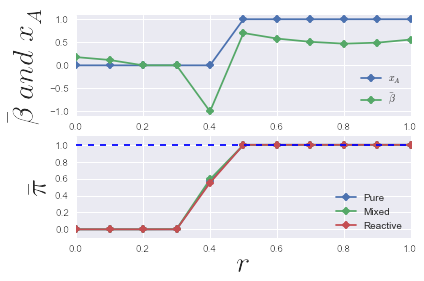

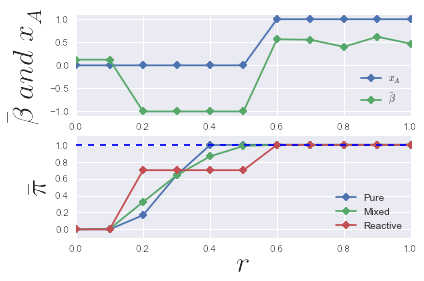

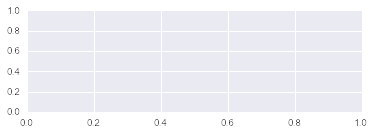

In [2]:
examples( AP = 11, reps = 1 , output = False)

Do an ST sweep, maybe use sweepy or the available functions.

In [ ]:
for alpha in [0,0.3,0.7,1.0]:
    draw_ST_space(reps = 1, alpha = alpha, points = 21)

The main paper plots the full model fitness minus the mixed strategy model fitness. Let's do that here, I'll use the sweepy module.

In [7]:
pl.figure()
for alpha in [0,0.3,0.7,1.0]:
    sweepy.sweep_func( relative_fitness, [ [ 'T', 0, 3, 2 ],[ 'S', -1, 2, 2 ] ], fixed_params = {'alpha':alpha},\
     ensure_dir = True, output_names = ["Relative Fitess"], reps = 1, look_for_data = True, output_directory = 'tmp' )

Found data at tmp\data.p
Loading
Found data at tmp\data.p
Loading
Found data at tmp\data.p
Loading
Found data at tmp\data.p
Loading


##Results

Let's take a look more closely at the two games we've decided to hone in on.

In [22]:
S_non_DOL, T_non_DOL = -0.2, 1.6
S_DOL, T_DOL = -0.2, 4.0

Let's do a more detailed sweep of these two.

-0.2 1.6
Rep: 0
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


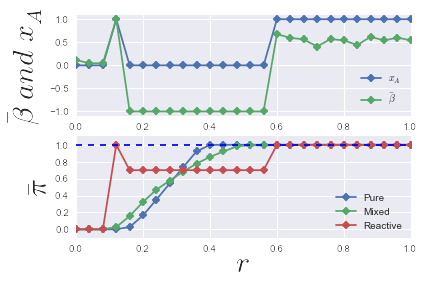

In [23]:
make_figure( S_non_DOL, T_non_DOL, alphaPoints = 26, reps = 1 )

By the look of it there are three qualitatively different regions in the model. Let's take a closer look at each in turn.

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Warning, frequencies sum to 0.000
Mean x =  1.0
Mean beta =  0.0
Final Fitness =  0.0


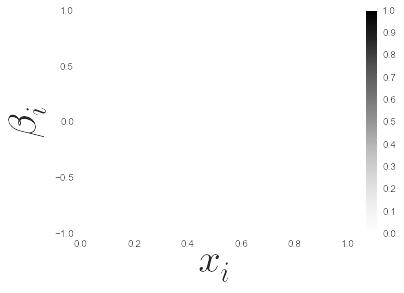

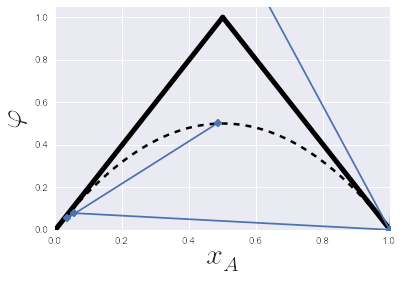

In [24]:
model = GP_evo(S_non_DOL, T_non_DOL, alpha = 0.0 )
model.go()

Unsurprisingly this one heads straight for the all defect setup

Mean x =  1.60693680584e-12
Mean beta =  -0.999999999998
Final Fitness =  0.699999999998


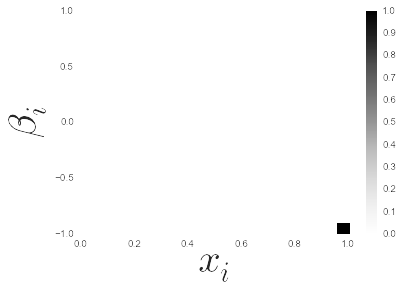

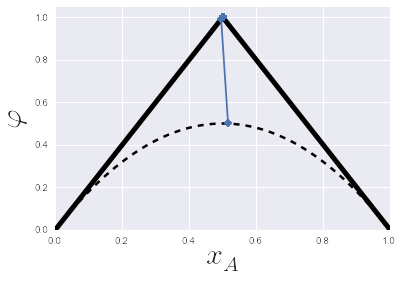

In [25]:
model = GP_evo(S_non_DOL, T_non_DOL, alpha = 0.3 )
model.go()

This one goes to the point x = 1/2, beta = -1, This is the structered ESS for a DOL game, however, this is not a DOL game, and is hence not optimal. Do we have a good reason for why this is?

Mean x =  1.0
Mean beta =  0.533328469879
Final Fitness =  0.999999999999


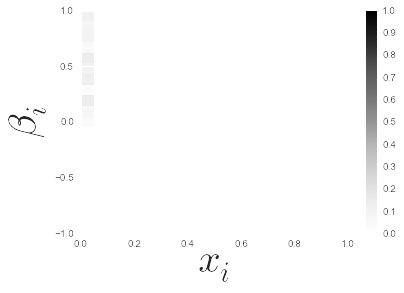

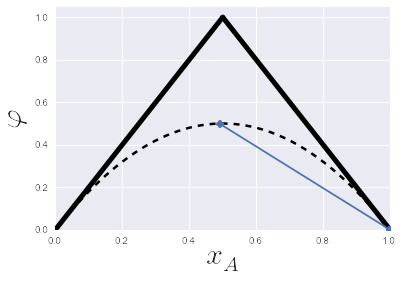

In [26]:
model = GP_evo(S_non_DOL, T_non_DOL, alpha = 1.0 )
model.go()

This one hits the ESS, there is nothing particularly surprising here.

Let's look at our DOL game now.

-0.2 4.0
Rep: 0


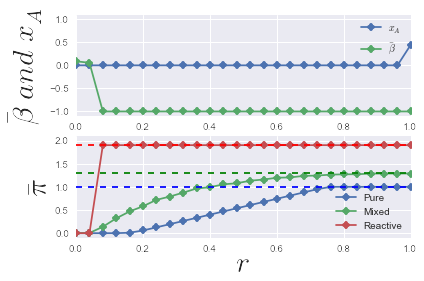

In [27]:
make_figure( S_DOL, T_DOL, alphaPoints = 26, reps = 1)

Here there are in fact only two stages, this doesn't seem to problematic.

The main problem seems to be that there is this intermediate stage in the prisoner's dilemma that we don't seem to understand. We can either a) try to understand it, or b) Find another set of parameters that does not have this feature, and brush it under the carpet.

-0.8 1.3
Rep: 0


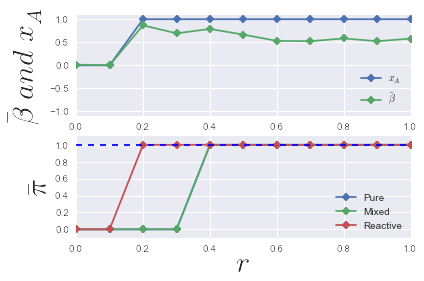

In [28]:
make_figure( -.8, 1.3, alphaPoints = 11, reps = 1, output = False )

-0.8 1.8
Rep: 0
Warning, frequencies sum to -0.000


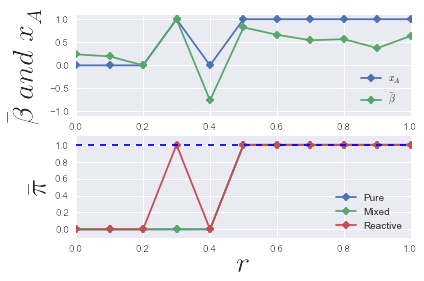

In [29]:
make_figure( -.8, 1.8, alphaPoints = 11, reps = 1, output = False )

-0.9 1.3
Rep: 0


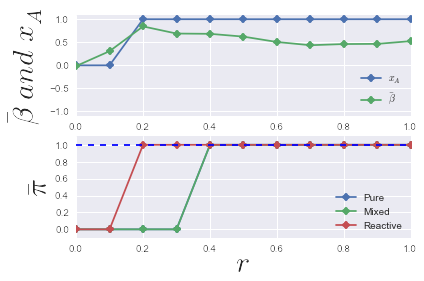

In [30]:
make_figure( -.9, 1.3, alphaPoints = 11, reps = 1, output = False )

-0.5 1.5
Rep: 0
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


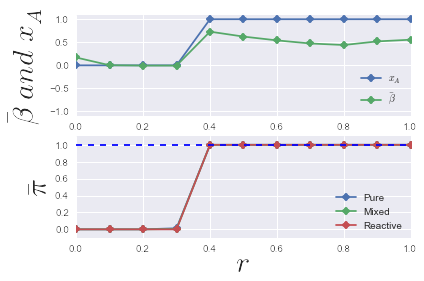

In [31]:
make_figure( -.5, 1.5, alphaPoints = 11, reps = 1, output = False )

It looks like we can indeed find values without this intermediate behaviour. Which to choose?

Let's test the changes to plotting function

Gennerating data
Rep: 0
Saving data to file ../figures_appendix2/data\3_mods_S_0.1_T_1.9.p
Saving figure to file ../figures_appendix2\3_mods_S_0.1_T_1.9.eps


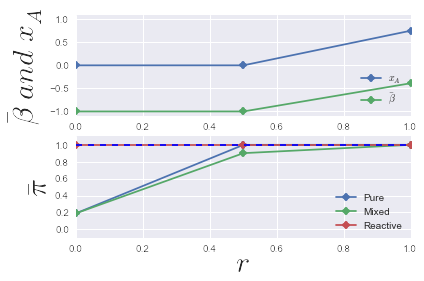

In [3]:
make_figure( 0.1,1.9,alphaPoints = 3, reps = 1, file_format = 'eps', output = False )

Gennerating data
Rep: 0
Saving data to file ../figures_appendix2/data\3_mods_S_-0.3_T_3.8.p
Saving figure to file ../figures_appendix2\3_mods_S_-0.3_T_3.8.png


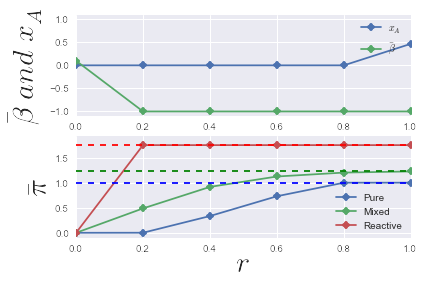

In [2]:
make_figure( -0.3, 3.8, alphaPoints = 6, reps = 1, output = False)